# Homework 1

In [33]:
import pandas as pd

## Question 1. Downloading the data

In [34]:
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [35]:
#How many columns are there?
print(f"There are about {df_jan.shape[0]} rows and {df_jan.shape[1]} columns in the January dataset.")

There are about 3066766 rows and 19 columns in the January dataset.


## Question 2. Computing duration
What's the standard deviation of the trips duration in January?

### Data Preprocessing

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def preprocess_and_plot_trip_durations(data):
    # Compute the duration in minutes
    data['duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60
    # Calculate the standard deviation of trip durations in January
    std_duration = data['duration'].std()
    print(f"The standard deviation of trip duration is {std_duration:.2f} minutes.")
    # Remove outliers by keeping durations between 1 and 60 minutes
    df = data[(data['duration'] >= 1) & (data['duration'] <= 60)].reset_index(drop=True)
    # Plot the histogram for the filtered duration column
    plt.figure(figsize=(10, 6))
    sns.histplot(df['duration'], bins=30, kde=True)
    plt.title('Histogram of Trip Durations (1 to 60 minutes) in January')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Frequency')
    plt.show()

    return df


The standard deviation of trip duration is 42.59 minutes.


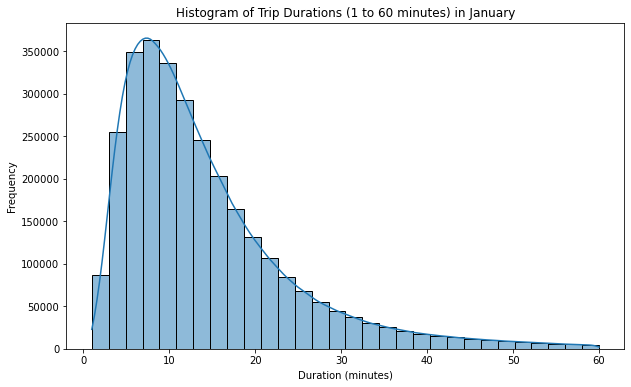

In [9]:
# Call the function
jan_data = preprocess_and_plot_trip_durations(df_jan)

The standard deviation of trip duration is 42.84 minutes.


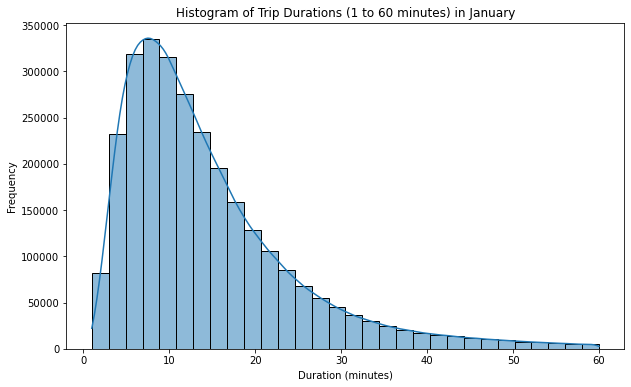

In [10]:
feb_data = preprocess_and_plot_trip_durations(df_feb)

In [11]:
# Columns datatypes
jan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009173 entries, 0 to 3009172
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

## Question 3. Handling Ouliers in the duration columns

In [12]:
# Fraction of records left
fraction_left = jan_data.shape[0] / df_jan.shape[0]

# Print the fraction of records left
print(f"The fraction of records left after dropping outliers is: {fraction_left*100:.0f}%")

The fraction of records left after dropping outliers is: 98%


## Question 4. One-hot encoding
### Apply one-hot encoding to pickup and dropoff location IDs


In [20]:

def to_encode(data):
    # Columns to consider
    cartegorical_columns = ['PULocationID','DOLocationID']
     # Cast location IDs to string to prevent label encoding
    data[cartegorical_columns] = data[cartegorical_columns].astype(str)
    # Convert dataframe to a list of dictionaries
    data_dicts = data[cartegorical_columns].to_dict(orient='records')
    return data_dicts

In [22]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer()
X_train    = vectorizer.fit_transform(to_encode(jan_data))
X_val      = vectorizer.transform(to_encode(feb_data))

In [24]:
# Extract the response variable
target  = 'duration'
y_train = jan_data[target].values
y_val   = feb_data[target].values

In [36]:
# The dimensionality of this matrix (number of columns)?
print(f"The dimensionality of the matrix is {X_train.shape[1]}")

The dimensionality of the matrix is 515


## Question 5. Training a model

- Train a plain linear regression model with default parameters, where duration is the response variable
- Calculate the RMSE of the model on the training data

In [26]:
# Train a linear regression model 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
    
# Predict durations
y_pred = model.predict(X_train)

In [29]:
#Calculate the RMSE of the model on the training data
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train,y_pred)
print(f" The MSE of the model on the training data is {mse:.2f}")

# Calculate the RMSE of the model on the training data

rmse = np.sqrt(mse)

print(f" The RMSE of the model on the training data is {rmse:.2f}")

 The MSE of the model on the training data is 58.51
 The RMSE of the model on the training data is 7.65


## Question 6. Evaluating the model

Apply this model to the validation dataset (February 2023)

In [30]:
y_pred_val = model.predict(X_val)

In [31]:
# The RMSE on validation data feb_data

mse_val = mean_squared_error(y_val,y_pred_val)
print(f" The MSE of the model on the training data is {mse_val:.2f}")

rmse_val = np.sqrt(mse_val)

print(f" The RMSE of the model on the training data {rmse_val:.2f}")

 The MSE of the model on the training data is 61.02
 The RMSE of the model on the training data 7.81
